# Data Scientist Challenge - LATAM Airlines

### Postulante: Jorge Allende Medrano

## Challenge
The problem consists in predicting the probability of delay of the flights that land or take off from the airport of Santiago de Chile
(SCL). For that you will have a dataset using public and real data where each row corresponds to a flight that landed or took off
from SCL during 2017. The following information is available for each flight:


In [1]:
#En primera instancia, importare las librerías que utilizaré para desarrollar este desafío
import pandas as pd
import numpy as np
from datetime import datetime, time
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from funciones import *

from sklearn.model_selection import train_test_split as TTS,cross_val_predict,GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

#metricas
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc



In [2]:
#Se crea un dataframe con el archivo en cuestión y se revisa el estado (df.head()).
df= pd.read_csv(r'C:\Users\4615018\Desktop\Latam\desaf\Challenge_Data_Scientist_LATAM\dataset_SCL.csv', low_memory=False)
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


### Variables

- Fecha-I: Scheduled date and time of the flight.
- Vlo-I : Scheduled flight number.
- Ori-I : Programmed origin city code.
- Des-I : Programmed destination city code.
- Emp-I : Scheduled flight airline code.
- Fecha-O : Date and time of flight operation.
- Vlo-O : Flight operation number of the flight.
- Ori-O : Operation origin city code
- Des-O : Operation destination city code.
- Emp-O : Airline code of the operated flight.
- DIA: Day of the month of flight operation.
- MES : Number of the month of operation of the flight.
- AÑO : Year of flight operation.
- DIANOM : Day of the week of flight operation.
- TIPOVUELO : Type of flight, I =International, N =National.
- OPERA : Name of the airline that operates.
- SIGLAORI: Name city of origin.
- SIGLADES: Destination city name.

In [3]:
#Se revisa la existencia de valores NaN en nuestro set datos.
val_nan = df.isna().sum()
print(val_nan)


Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64


In [4]:
#Se procede a eliminar aquellas rows donde se encuentran valores vacíos (solo 1).
df2 = df.dropna(axis=0)
df2.head()


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [5]:
#Observaremos los tipos de datos que tenemos en nuestro dataframe.
df.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

In [6]:
#Revisamos el tamaño de nuestro dataset tanto de la cantidad de rows como columnas.
df2.shape

(68205, 18)

In [7]:
#Crearé 3 listas con variables de origin city code, departure city code y flight airline code con la intención de entender si existen variables que me esten entregando la misma info.
origen = ['Ori-I','Ori-O','SIGLAORI']
des = ['Des-I','Des-O','SIGLADES']
emp = ['Emp-O','Emp-I','OPERA']
vuelos = ['Vlo-I','Vlo-O']


In [8]:
#Se aplicará una función para conocer la distribución porcentual las variables de la lista origen
distribucion_porcentual(df2,origen)

Distribución porcentual de la variable 'Ori-I':
SCEL    100.0
Name: Ori-I, dtype: float64
Distribución porcentual de la variable 'Ori-O':
SCEL    100.0
Name: Ori-O, dtype: float64
Distribución porcentual de la variable 'SIGLAORI':
Santiago    100.0
Name: SIGLAORI, dtype: float64


In [9]:
#Se aplicará una función para conocer la distribución porcentual las variables de la lista des
distribucion_porcentual(df2,des)

Distribución porcentual de la variable 'Des-I':
SCFA    8.484715
SPJC    7.725240
SCCF    7.543435
SCTE    6.388095
SCIE    5.857342
SCDA    5.493732
SBGR    5.234220
SAEZ    4.750385
SABE    4.536324
SCQP    3.787112
Name: Des-I, dtype: float64
Distribución porcentual de la variable 'Des-O':
SCFA    8.483249
SPJC    7.725240
SCCF    7.544901
SCTE    6.388095
SCIE    5.854410
SCDA    5.493732
SBGR    5.232754
SAEZ    4.751851
SABE    4.536324
SCQP    3.795909
Name: Des-O, dtype: float64
Distribución porcentual de la variable 'SIGLADES':
Buenos Aires    9.288175
Antofagasta     8.483249
Lima            7.725240
Calama          7.544901
Puerto Montt    6.388095
Concepcion      5.854410
Iquique         5.493732
Sao Paulo       5.232754
Temuco          3.795909
Arica           3.571586
Name: SIGLADES, dtype: float64


In [10]:
#Podemos observar que tenemos un dato más en la variable Des-I, SARI, que solo esta presente una vez. Se anilazará quitarla. 
ld = (df2['Des-I'] != df2['Des-O']).sum()

print(f"Hay {ld} líneas distintas entre las columnas Des-I y Des-O.")     

Hay 28 líneas distintas entre las columnas Des-I y Des-O.


In [11]:
#Se aplicará una función para conocer la distribución porcentual las variables de la lista emp
distribucion_porcentual(df2,emp)

Distribución porcentual de la variable 'Emp-O':
LAN    30.771938
LXP    21.344476
SKU    20.963272
TAM     4.465948
ARG     2.853163
CMP     2.712411
JMR     2.414779
LPE     1.779928
JAT     1.605454
AVA     1.297559
Name: Emp-O, dtype: float64
Distribución porcentual de la variable 'Emp-I':
LAN    55.144051
SKU    20.963272
TAM     4.470347
ARG     2.857562
CMP     2.712411
LAW     2.306283
AVA     1.689026
JAT     1.605454
GLO     1.181732
AAL     1.109889
Name: Emp-I, dtype: float64
Distribución porcentual de la variable 'OPERA':
Grupo LATAM              59.954549
Sky Airline              20.963272
Aerolineas Argentinas     2.857562
Copa Air                  2.712411
Latin American Wings      2.452899
Avianca                   1.689026
JetSmart SPA              1.605454
Gol Trans                 1.181732
American Airlines         1.109889
Air Canada                0.828385
Name: OPERA, dtype: float64


In [12]:
df2['Vlo-O'].unique()
#Se observa que tenemos 2 tipos de datos '940' y '582.0', se dejará como la primera de estas.
df2['Vlo-O'] = df['Vlo-O'].str.replace(r'\.0$', '')

In [13]:
ld =(df2['Emp-I'] != df2['Emp-O']).sum()
print(ld)

18668


In [14]:
#Crearé una lista de variables categoricas para graficar su distribución.
variables = ['DIANOM','DIA','MES','AÑO','TIPOVUELO','OPERA','SIGLADES','SIGLAORI','Des-I','Des-O','Emp-O','Emp-I']
#En primera instancia no se pudo graficar la variable 'Vlo-O' por lo que se analizará en particular
df2['Vlo-O'].unique()
#Se observa que tenemos 2 tipos de datos '940' y '582.0', se dejará como la primera de estas.
df2['Vlo-O'] = df['Vlo-O'].str.replace(r'\.0$', '')

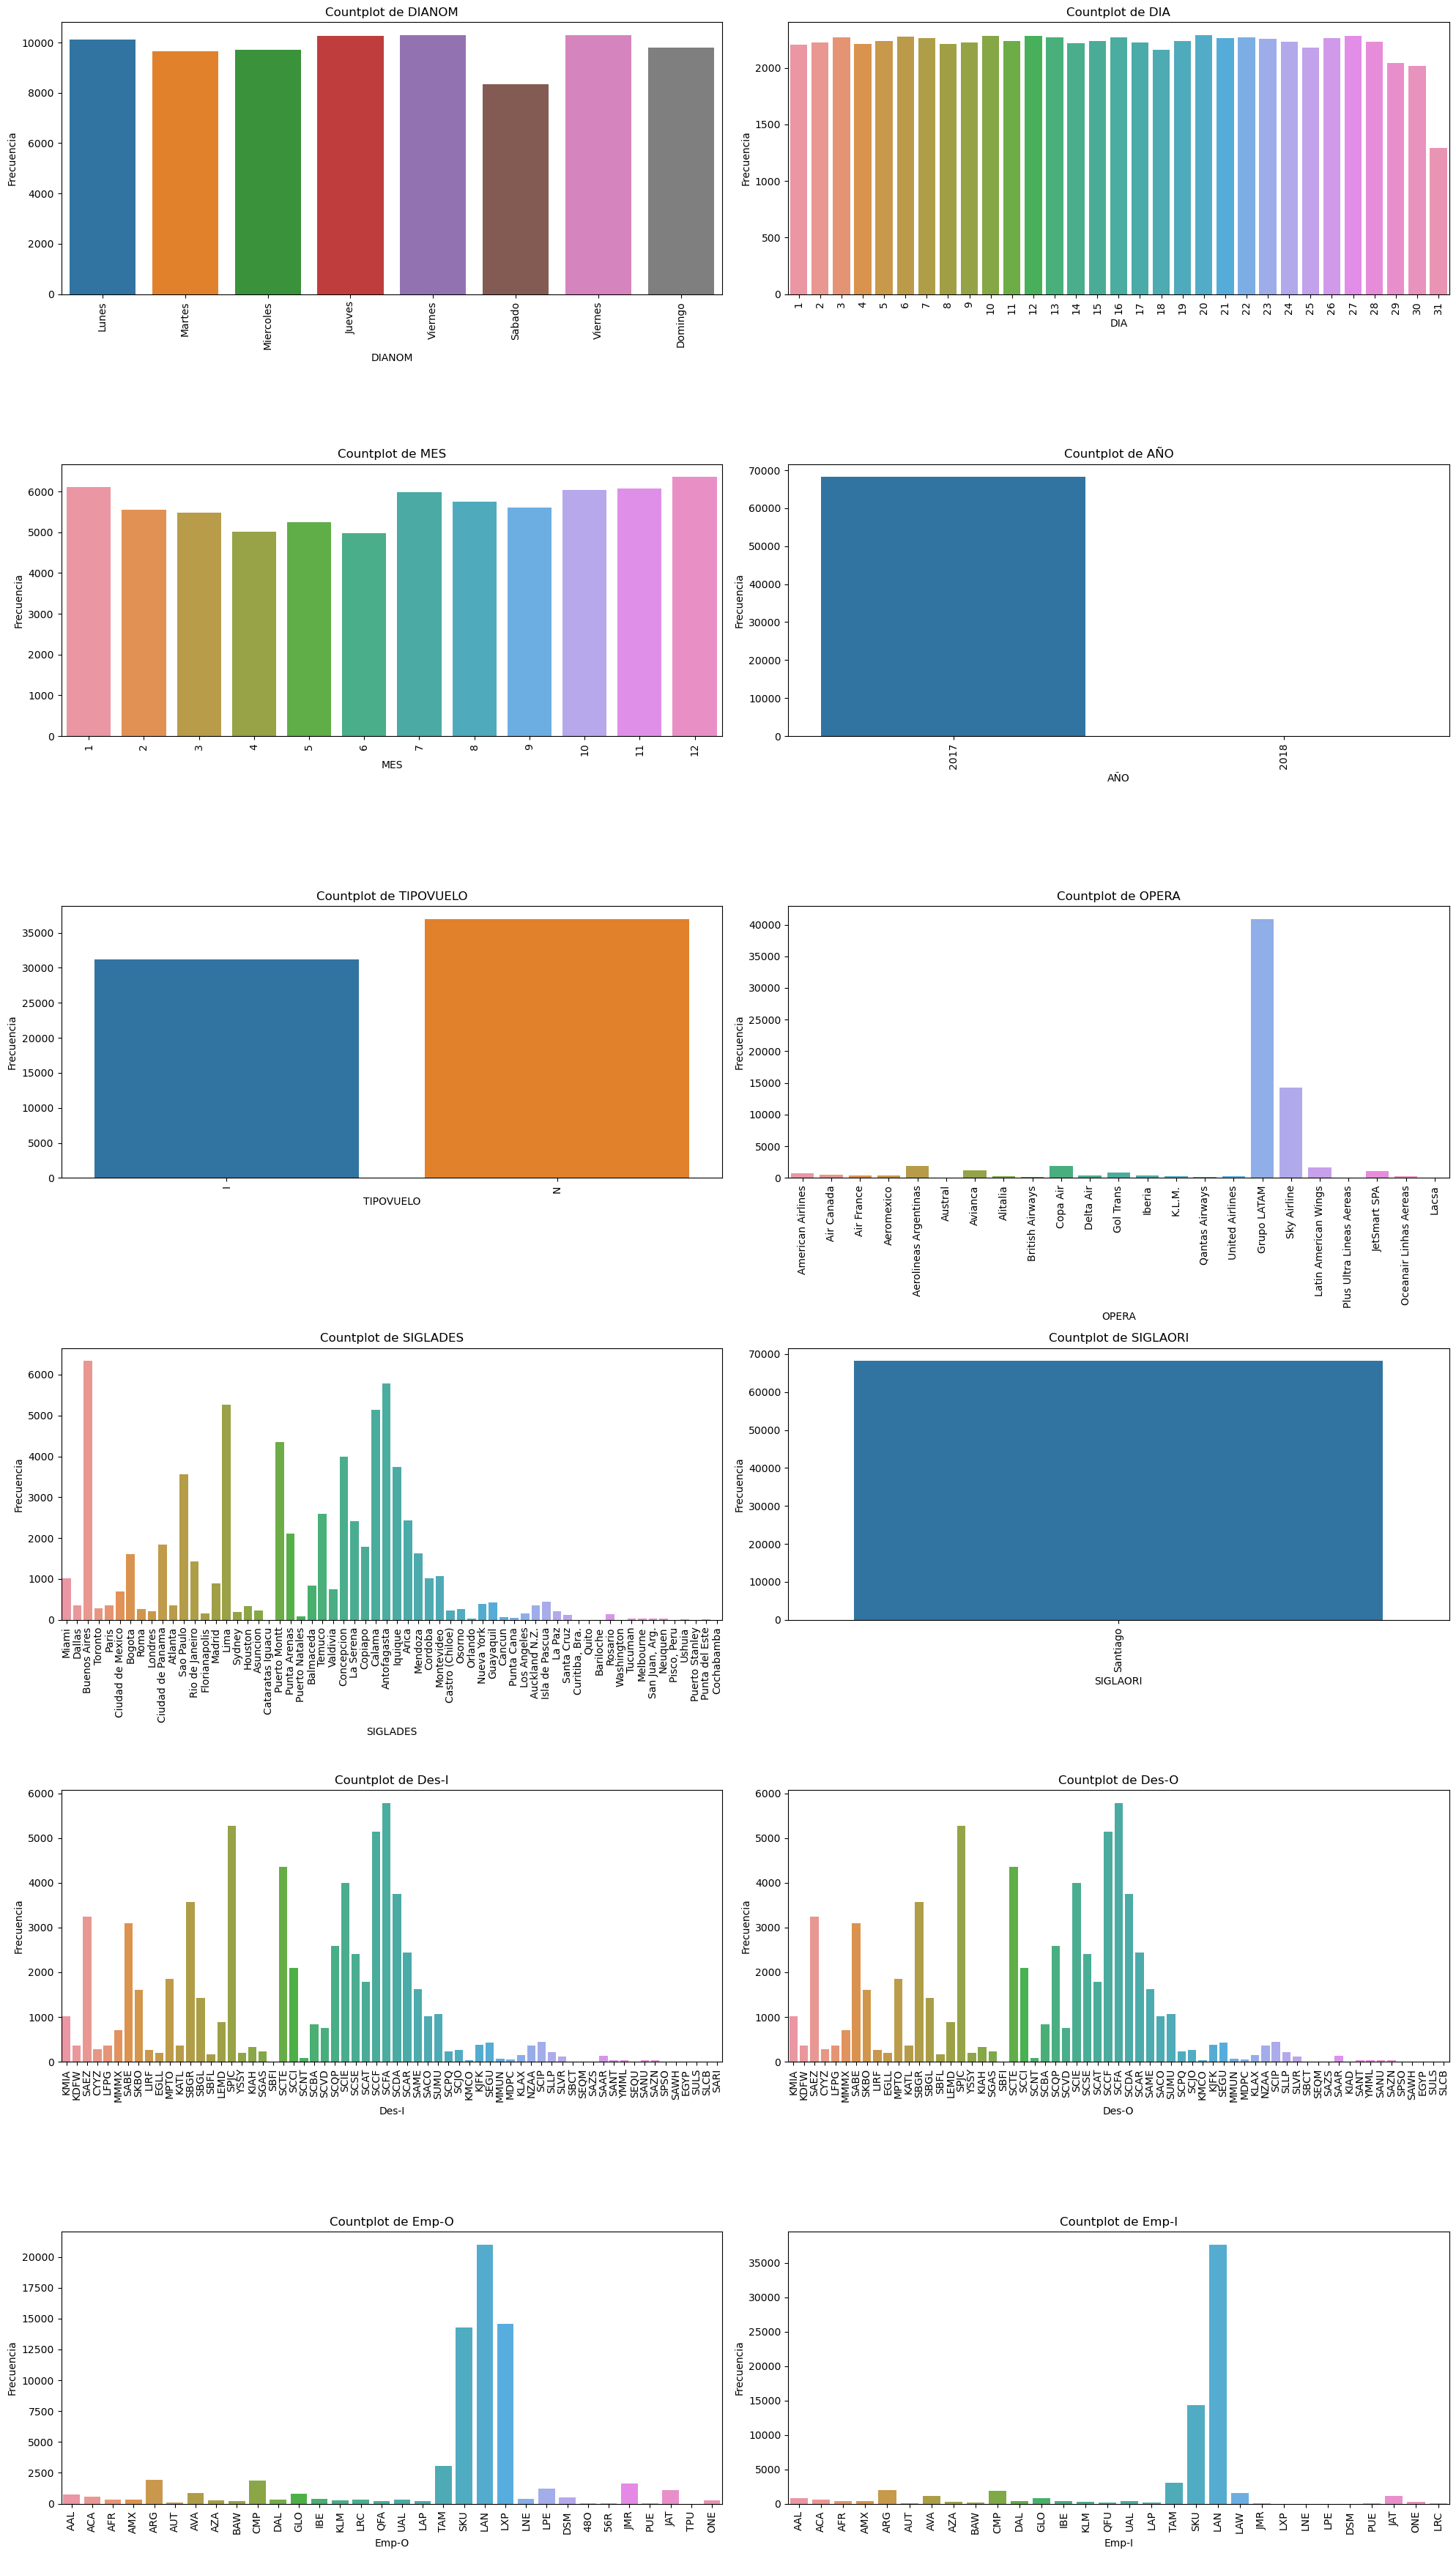

In [15]:
countplot(df2,variables,20,35)

In [16]:
#Se observa, que existen dos lineas que indican que el vuelo es año 2018, podría existir la posibilidad de eliminarlas.
df_2018=df2[df2['AÑO']==2018]

In [17]:
#Comparativa porcentual mercado nacional vs internacional
distribucion_porcentual(df2,['TIPOVUELO'])

Distribución porcentual de la variable 'TIPOVUELO':
N    54.198373
I    45.801627
Name: TIPOVUELO, dtype: float64


In [18]:
des = df2[df2['SIGLADES'] == 'Buenos Aires']
des['Des-I'].value_counts('%')

SAEZ    0.511444
SABE    0.488398
SEGU    0.000158
Name: Des-I, dtype: float64

## I) Analisis de datos base

- En primera instancia, podemos observar que las variables origin city code, es decir, 'Ori-I','Ori-O','SIGLAORI' son exactamente iguales, por lo que, en terminos de modelación se trabajará solo con una de las tres. De la misma forma, este caso casi se replica para las variables 'Des-I', 'Des-O', ya que, hay solo 28 líneas distintas entre ellas y además, esta última cuenta con un dato unico más, SARI, que está presente solo 1 vez en todo el set de datos.

- Con respecto las variables de tiempo, es decir, mes, año, día de la semana, día del mes tenemos los siguiente insights:
    - Existe un compartimiento de operacion de vuelo similar en los días de la semana a excepción de una baja notoria durante el día sabado.
    - Se observa una disminución de la operacion de vuelo para los últimos días del mes, es decir, 29, 30 y 31. Este ultimo puede explicarse porque no todos los meses tienen 31.
    - Existe un aumento en la operación de vuelo en los meses de julio y agosto. De la misma forma, a contar del mes de octubre en adelante comienzan a incrementar esos mismos, bajando levemente en enero.
    - Será interesante observar eliminar 2 datos asociados al año 2018, ya que, no son representativos a la cantidad de data.  
    
- Con respecto a las operaciones de vuelo llevadas a cabo tenemos los siguiente observaciones:
    - Podemos observar que el mercado de vuelo se distribuye relativamente similar con respecto a operaciones de vuelo nacionales (54%) e internacionales (46%).
    - Las ciudades internacionales con mayor operacion de vuelo son Buenos Aires, Lima y Sao Paulo.
    - Las ciudades nacionales con mayor operacion de vuelo son Antofagasta, Calama y Concepción.
    - Todos los vuelos salen del mismo y unico origen, Santiago de Chile. En adición, se puede observar que el grupo LATAM opera el 60% de los vuelos, seguido por Sky Airline con un 21%.

## II) Creación de variables binarias

In [19]:
#Hacemos una copia del dataframe en el que estamos trabajando para cambiar el formato de fecha
df3 = df2.copy()
df3['Fecha-I'] = pd.to_datetime(df3['Fecha-I'])
df3['Fecha-O'] = pd.to_datetime(df3['Fecha-O'])


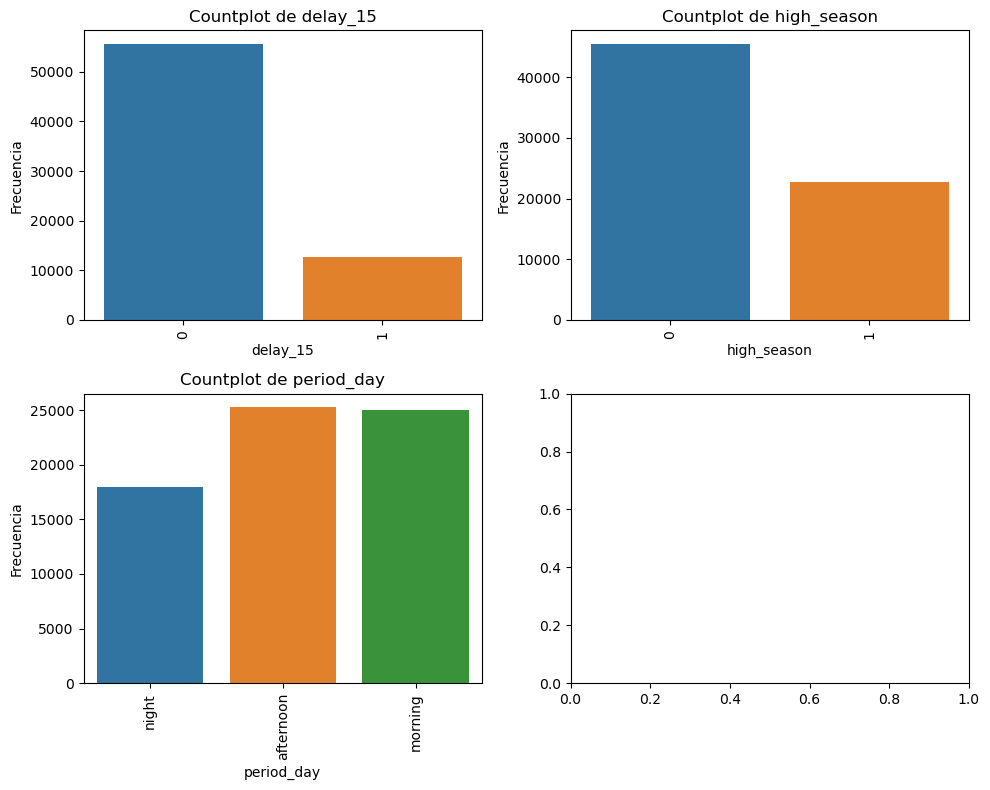

In [20]:
#En este espacio se crearán las variables dummies

#Validador de temporada alta, la función se encuentra en el archivo funciones.py al igual que todas.
df3['high_season'] = df3['Fecha-I'].apply(validador_high_season)

#Variable entrega los minutos de diferencia entre la fecha de operacion de vuelo vs la agendada.
morning_i = time(5,0,0)
afternoon_i = time(12,0,0)
night_i = time(19,0,0)

df3['min_diff'] = (df3['Fecha-O'] - df3['Fecha-I']).dt.total_seconds() / 60

#Esta variable busca conocer si es que los minutos entre la operacion de vuelo y la agendada es mayor a 15 minutos.

df3['delay_15'] = np.where((df3['min_diff'] > 15),1,0)

#Esta variable me indica los periodos del día donde está operando un vuelo.

condiciones = [(df3['Fecha-O'].dt.time >= morning_i ) & (df3['Fecha-O'].dt.time < afternoon_i),(df3['Fecha-O'].dt.time >= afternoon_i  ) & (df3['Fecha-O'].dt.time < night_i)]

intervalos_period_day = ['morning', 'afternoon']

df3['period_day'] = np.select(condiciones, intervalos_period_day, default = 'night')

#Volvemos a graficar para conocer el estado de nuestras nuevas variables.
var_bin = ['delay_15','high_season','period_day']

#Se graficarán las nuevas variables.
countplot(df3,var_bin,10,8)




In [21]:
#distribución porcentual de las variables en cuestión.
distribucion_porcentual(df3,var_bin)

Distribución porcentual de la variable 'delay_15':
0    81.505755
1    18.494245
Name: delay_15, dtype: float64
Distribución porcentual de la variable 'high_season':
0    66.628546
1    33.371454
Name: high_season, dtype: float64
Distribución porcentual de la variable 'period_day':
afternoon    37.029543
morning      36.639543
night        26.330914
Name: period_day, dtype: float64


## III) Creación de variables categoricas.

- Se puede inferir que nuestra variable objetivo es delay_15, la cual está fuertemente desbalanceada, es decir, el porcentaje de distribución es de 81% cuando la la diferencia entre la hora de operación de vuelo y la agendada es menor a 15 minutos.
- El procentaje de vuelos en temporada baja cubre el 66% de la operación de vuelo. Sin embargo, el porcenta de tiempo del cual está habilitada la temporada alta es bastante más bajo.
- La operacion de vuelo se genera principalmente de tarde y de mañana con un 37% y 36% respectivamente.

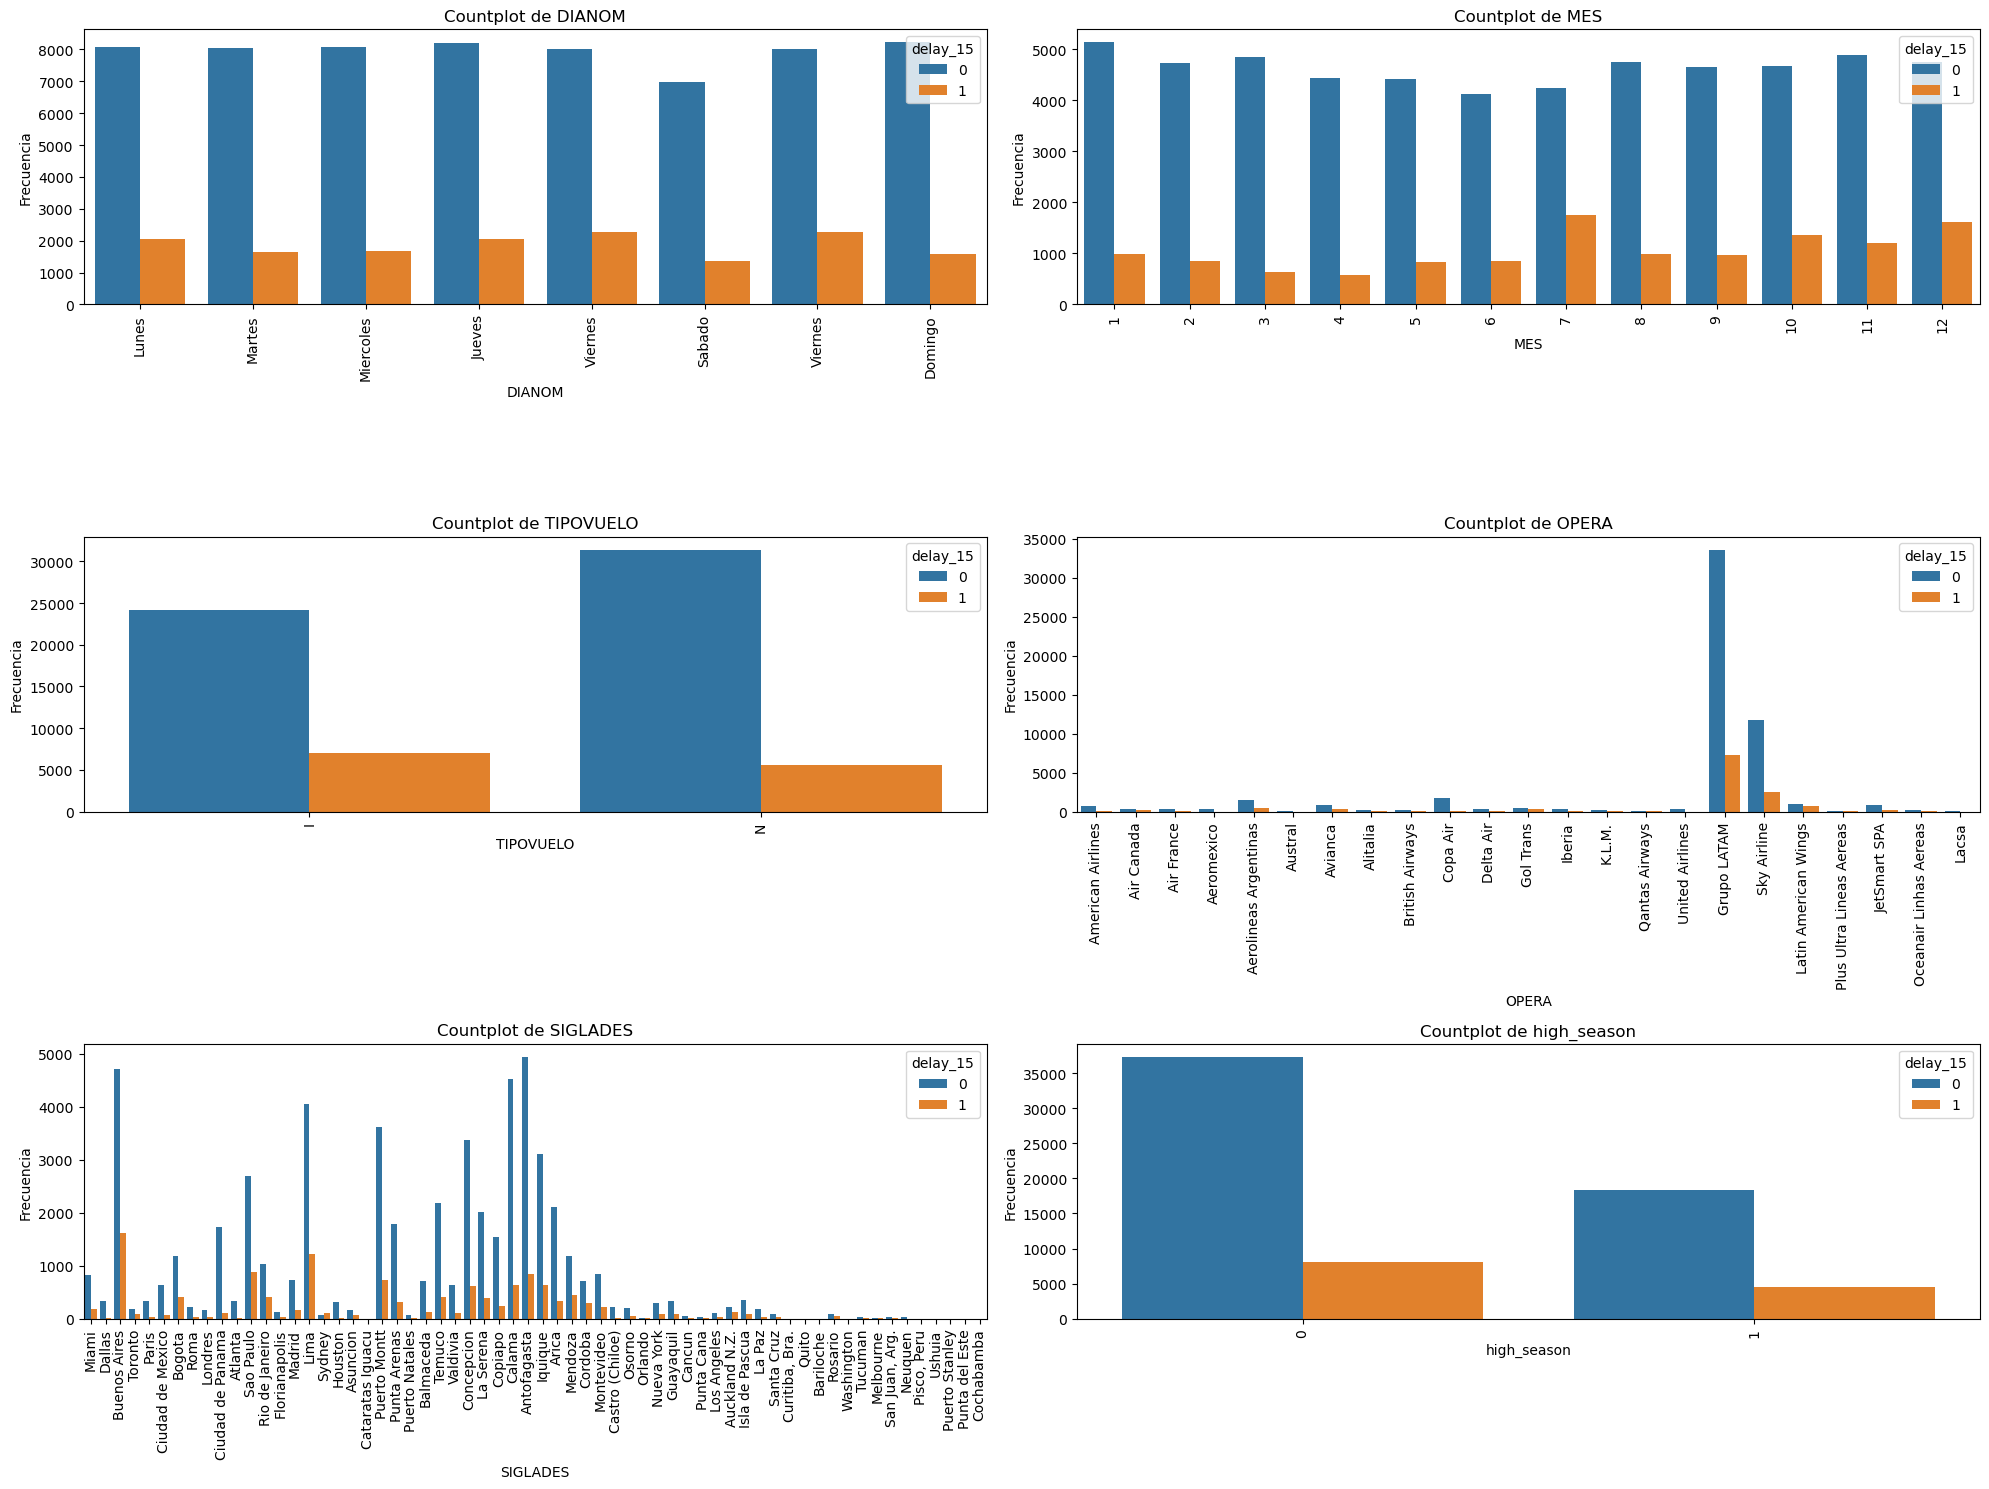

In [22]:
col = ['DIANOM','MES','TIPOVUELO','OPERA','SIGLADES','high_season']
countplot(df3,col,20,15,'delay_15')

- En cuanto a las variables predictoras, se puede observar en las graficas los siguientes insights:
    - Los meses que existe temporada alta, se ve una clara presencia de delay. Julio (07) es el ejemplo grafica "Countplot de MES".
    - Sumado al punto anterior, se puede observar que cuando un vuelo es de caracter internacional, tiene una mayor probabilidad de tener delay, en la grafica "Countplot de SIGLADES", las ciudades de Buenas Aires, Lima y Sao Paulo ejemplifican lo señalado.
    - La tendencia de delay en temporada alta se enmarca bastante, según muestra el gráfico "Countplot de high_season".
    - Será importante evaluar la composición de la variable en la que se basa nuestro vector objetivo, es decir, 'min_diff' que contiene los minutos entre lo agendado para la operacion de vuelo y la operacion de vuelo.
    
- En resumen, se puede observar que el tipo de vuelo, la temporada y los meses son las variables que más pueden explicar un delay en una operación de vuelo.

In [23]:
#análisis de la variable 'min_diff', cuando los minutos son menores o igual a cero y mayores a cero.

#filtro de dataframe menor o igual a 0 con respecto a la variable 'min_diff'
df4 = df3[df3['min_diff']<=0]
#filtro de dataframe mayor a 0 con respecto a la variable 'min_diff'
df5 = df3[df3['min_diff']>0]

#Composición estadistica menor o igual a 0 con respecto a la variable 'min_diff
df4['min_diff'].describe()


count    22699.000000
mean        -3.019560
std          3.019639
min        -14.000000
25%         -4.000000
50%         -2.000000
75%         -1.000000
max          0.000000
Name: min_diff, dtype: float64

In [24]:
#Composición estadistica con respecto a la variable 'min_diff
df3['min_diff'].describe()

count    68205.000000
mean         9.110945
std         19.313514
min        -14.000000
25%         -1.000000
50%          4.000000
75%         12.000000
max        161.000000
Name: min_diff, dtype: float64

In [25]:
#Composición estadistica mayor a 0 con respecto a la variable 'min_diff'
df5['min_diff'].describe()

count    45506.000000
mean        15.161803
std         21.083542
min          1.000000
25%          4.000000
50%          8.000000
75%         17.000000
max        161.000000
Name: min_diff, dtype: float64

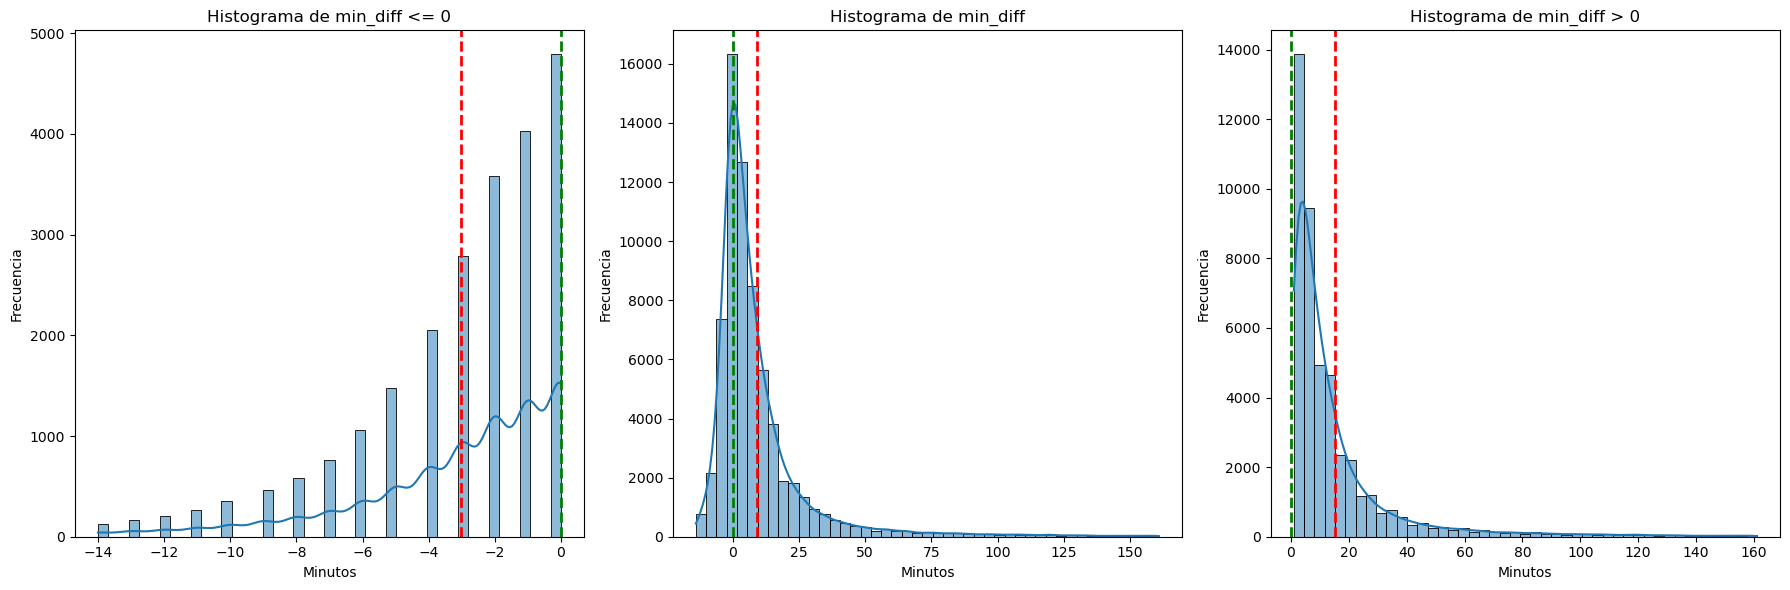

In [26]:
#graficamos los 3 estados de la variable, es decir, de iziquierda a derecha en los casos cuando es menor igual 0, la variable sin filtrar y cuando es mayor 0.
dataframes = [df4,df3, df5]

minutos_diff(dataframes,'min_diff')

- Caso 'min_diff' <= 0:
    - Podemos observar que la media es -3 minutos y con una desviación estandar de 3 minutos.
    - La grafica presenta el 33% de la data, además se concentra entre -3 minutos y 0 minutos.
- Caso 'min_diff' completo.
    - Con el 100% de la data podemos observar que el 66% de la data está a la derecha de la linea verde, que representa 0 minutos. Además la media es de 9 minutos (linea roja).
- Caso 'min_diff' > 0:
    -Este caso concentra el 66% de la data y la media es de 15 minutos. En adición, el porcentaje de data que se encuentra a la derecha de la linea roja es del 18% con respecto al total lo que reafirma nuevamente que nuestra variable objetivo está desbalanceada.
    

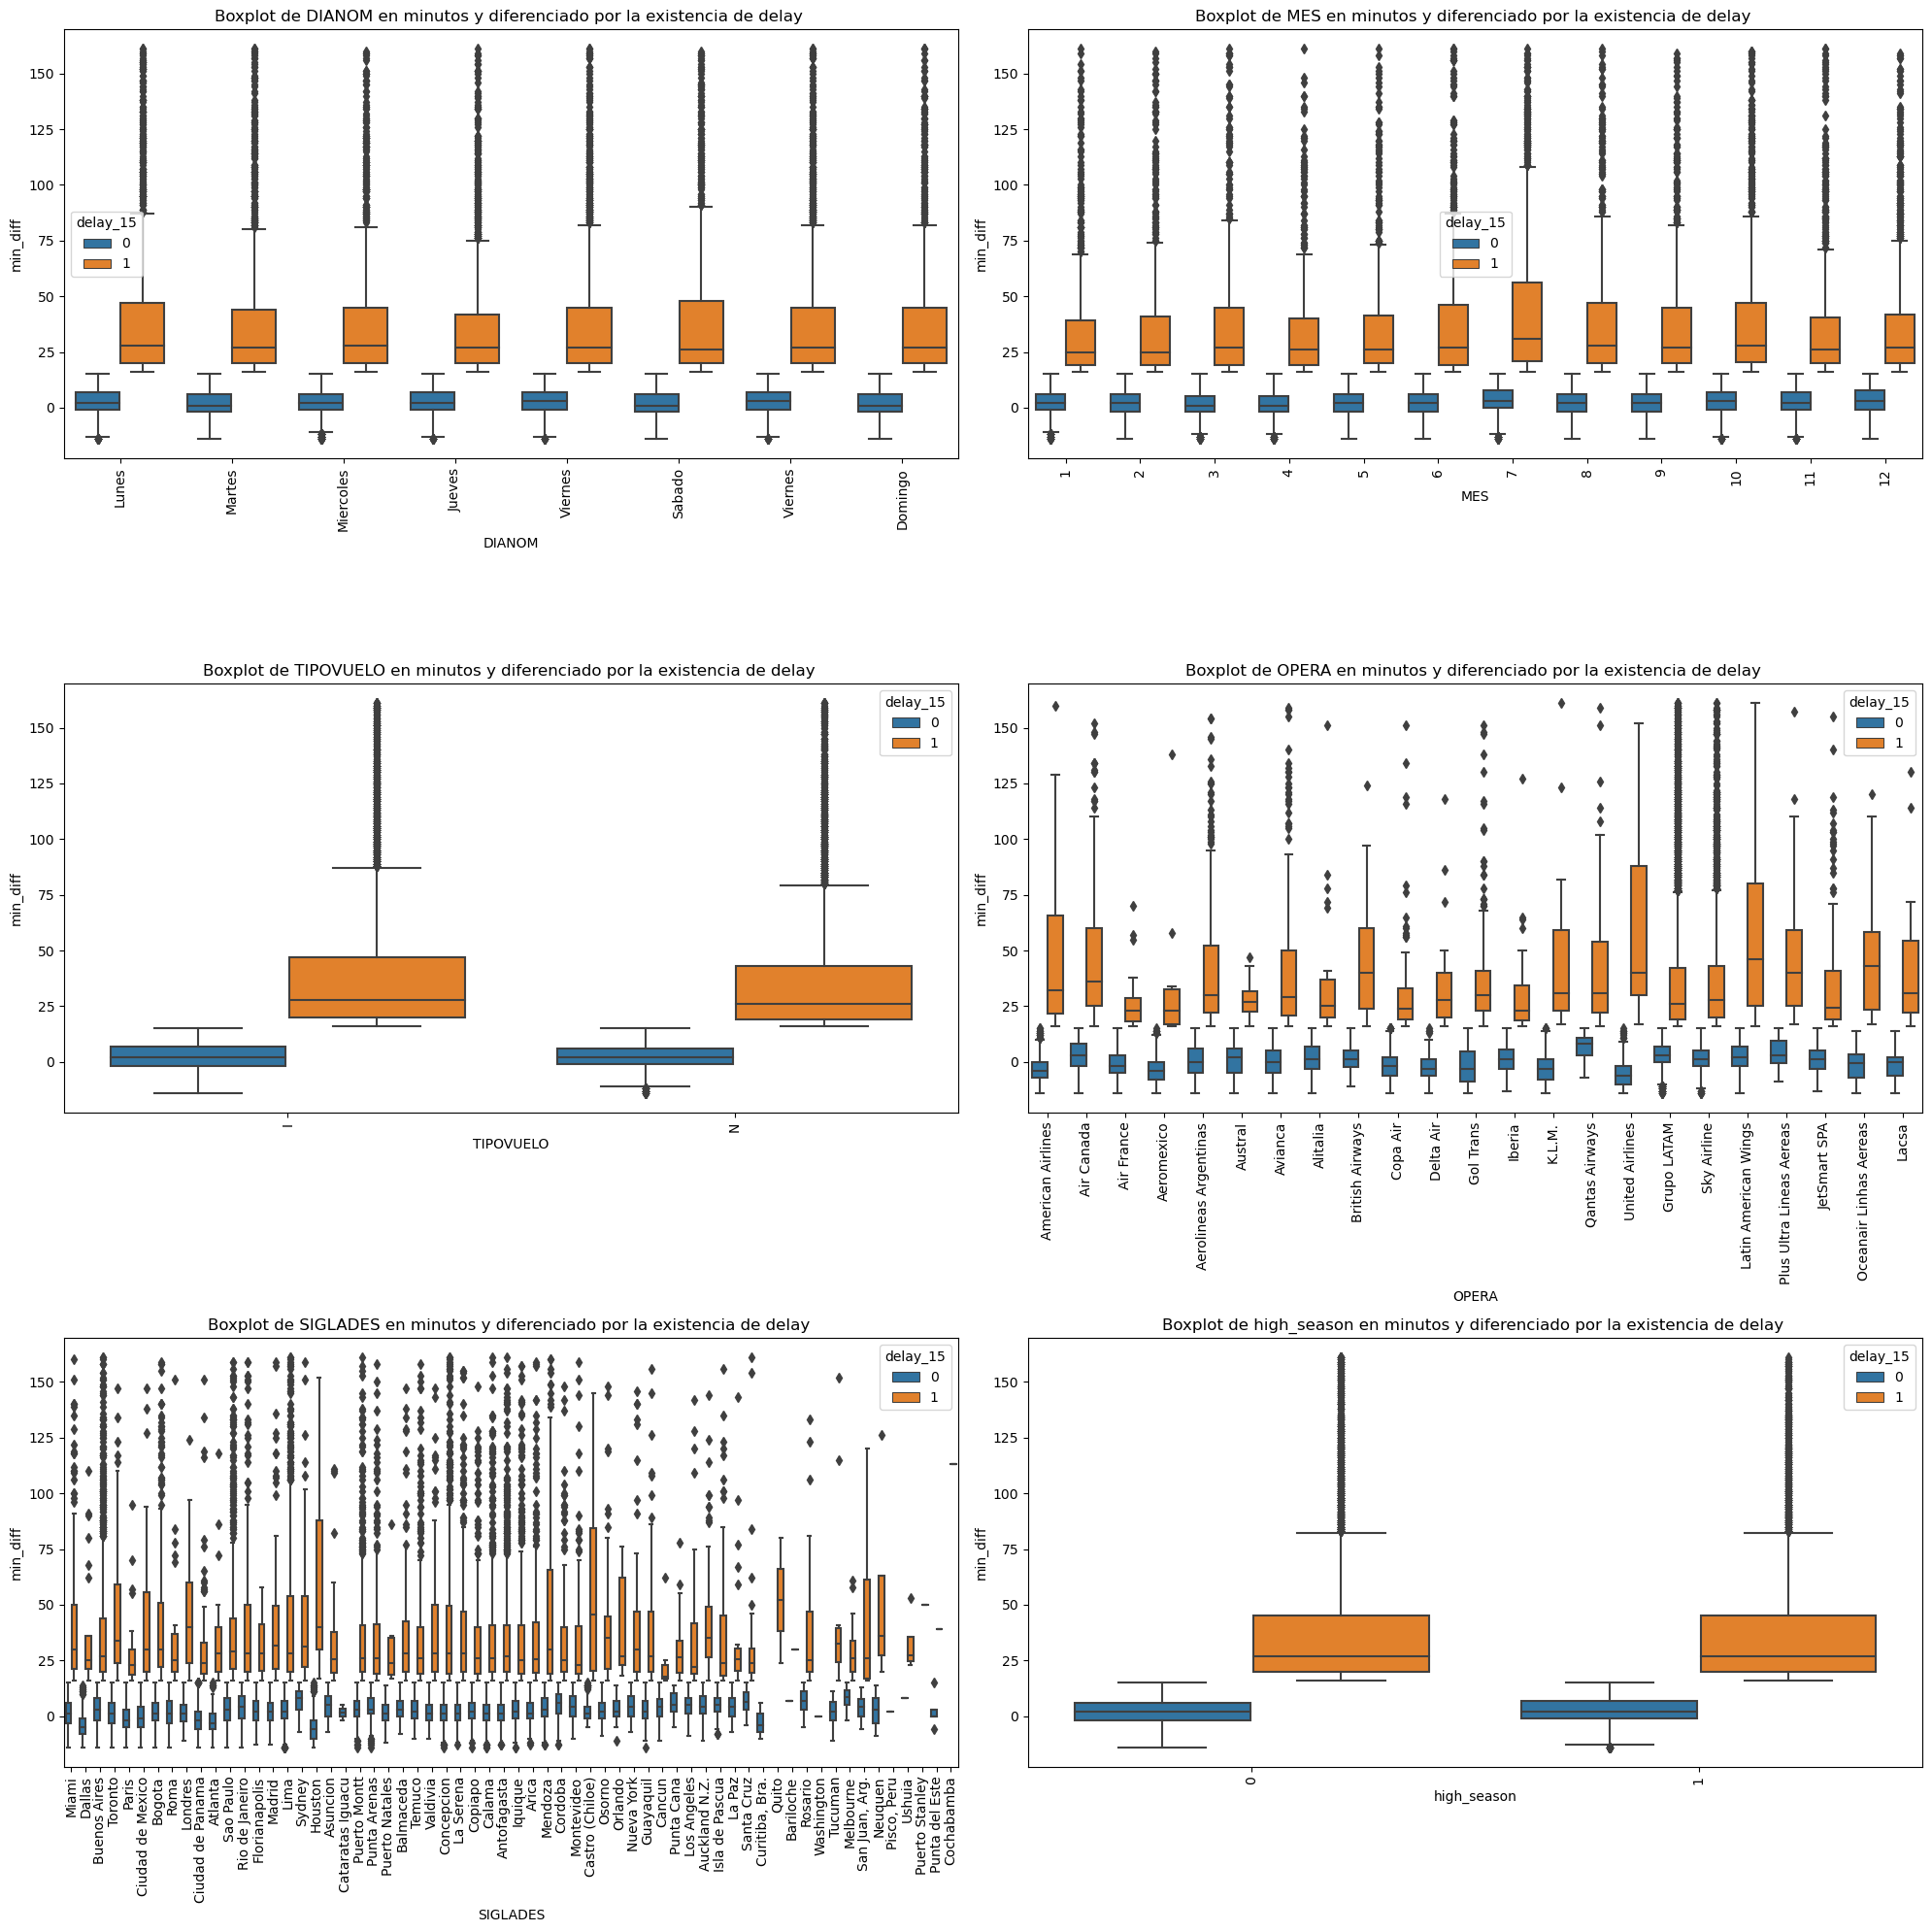

In [27]:
#Dado la información señalada previamente, se estudiarán las variables asociadas al punto 3 en una perspectiva de boxplot
boxplot(df3,col,20,20,'min_diff','delay_15')

- Las graficas que se muestran seña

## 4) Preprocesamiento y modelamiento

<Axes: >

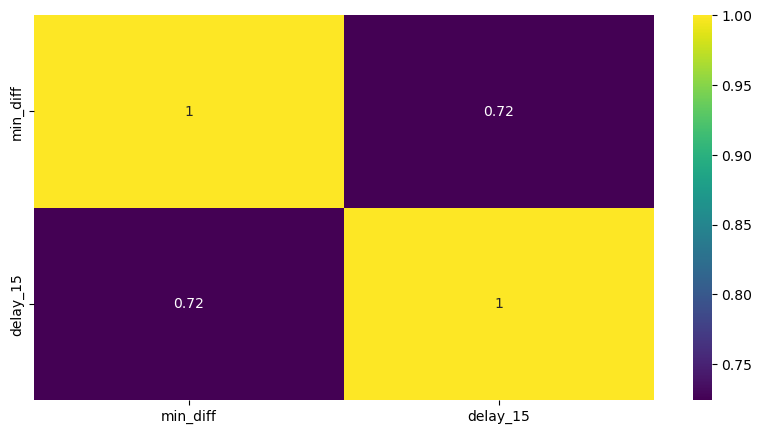

In [28]:
#observaremos las variables numericas para entender la correlación con nuestra variable objetivo.
numericas=['min_diff','delay_15']
#Las variables numericas sería solamente los minutos, ya que, mes, año y dias son de caracter numerico pero categoricas.
plt.subplots(figsize=(10,5))
sns.heatmap(df3[numericas].corr()[(df3[numericas].corr()>0.7) | (df3[numericas].corr()<-0.7)], annot=True,cmap='viridis')

- Podemos observar que existe una alta correlacion entre la delay_15 (variable objetivo) y min_diff. Por lo que se quitará del modelo.
- Es importante destacar que no todas las variables se utilizaran dentro
- Nuestro dataframe basal tiene más de 1400 variables si es que aplicamos dummies a todas las columnas. En consecuencia, el costo de procesamiento es demasiado alto, por lo que, se quitarán las variables que están presentes en las lista "col_quitar".

In [29]:
#quitar columnas y rows.
col_quitar = ['Ori-I', 'Ori-O','AÑO','Fecha-I','Fecha-O','min_diff','Des-I','Vlo-I','Emp-O','Des-O','Emp-I','Vlo-O']
df_new = df3.drop(columns=col_quitar)

In [30]:
# Utiliza esta celda para generar variables binarias omitiendo una categoría
df_dummies = pd.get_dummies(df_new, drop_first=True)
df_dummies.head()

,DIA,MES,high_season,delay_15,DIANOM_Jueves,DIANOM_Lunes,DIANOM_Martes,DIANOM_Miercoles,DIANOM_Sabado,DIANOM_Viernes,...,SIGLADES_Sao Paulo,SIGLADES_Sydney,SIGLADES_Temuco,SIGLADES_Toronto,SIGLADES_Tucuman,SIGLADES_Ushuia,SIGLADES_Valdivia,SIGLADES_Washington,period_day_morning,period_day_night
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Modelos a utilizar:

- Modelo de Regresión logística
- Modelo GradientBoost
- Modelo XGboost
- Modelo SVC
- Modelo RandomForest

In [40]:
# Se definen los hiperparametros para trabajar y cada uno de los modelos.

parametros_SVC = {'C': [ 0.001, 0.01, 1],
                  'gamma': [  0.001, 1, 10],
                  'class_weight': ['balanced']}

parametros_RF = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}

parametros_GB = {'learning_rate': [0.01, 0.1, 0.5],
                 'n_estimators': [50, 100, 500, 1000, 2000],
                 'subsample': [0.1 ,0.5, 0.9]}

parametros_LG = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                 'fit_intercept': [True, False]
                }
parametros_xgboost ={
    'scale_pos_weight': [10,4], 
    'max_depth': [4, 6, 8],             
    'min_child_weight': [1, 3, 5],      
    'subsample': [0.7, 0.8, 0.9],       
    'colsample_bytree': [0.7, 0.8, 0.9], 
    'learning_rate': [0.01, 0.1, 0.2],   
    'n_estimators': [50, 100, 200],                      
}


In [41]:
##RL

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores parámetros:  {'C': 1, 'fit_intercept': True}
Mejor puntaje     :  0.8153051306074456
Metricas a evaluar: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     18434
           1       0.58      0.04      0.08      4074

    accuracy                           0.82     22508
   macro avg       0.70      0.52      0.49     22508
weighted avg       0.78      0.82      0.75     22508



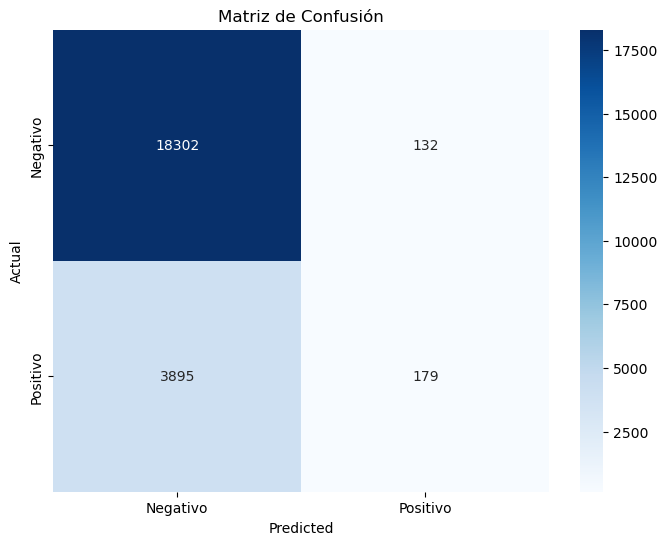

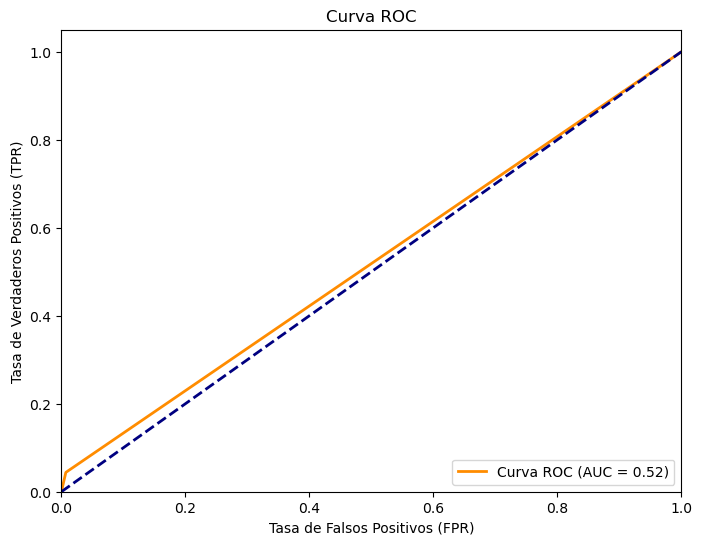

Característica: OPERA_Air Canada, Coeficiente Absoluto: 1.2924028315739282
Característica: OPERA_Latin American Wings, Coeficiente Absoluto: 1.2744484794002333
Característica: OPERA_American Airlines, Coeficiente Absoluto: 1.2593506940196382
Característica: SIGLADES_Sydney, Coeficiente Absoluto: 0.9839861772683873
Característica: OPERA_Qantas Airways, Coeficiente Absoluto: 0.9729501171463348
Característica: SIGLADES_Ciudad de Mexico, Coeficiente Absoluto: 0.9373171351641253
Característica: OPERA_Aeromexico, Coeficiente Absoluto: 0.8738084152243046
Característica: OPERA_Gol Trans, Coeficiente Absoluto: 0.7476571196939839
Característica: OPERA_United Airlines, Coeficiente Absoluto: 0.7451758190205496
Característica: SIGLADES_Houston, Coeficiente Absoluto: 0.7451758190205496
Característica: SIGLADES_Atlanta, Coeficiente Absoluto: 0.7428474048995304
Característica: OPERA_Delta Air, Coeficiente Absoluto: 0.7428474048995304
Característica: OPERA_Oceanair Linhas Aereas, Coeficiente Absoluto: 

In [42]:
modelamiento(df_dummies,'delay_15',LogisticRegression(),parametros_LG,5,-1,5)

- El modelo de regresión logística indica que tiene una capacidad de precisión, es decir, de todas las predicciones positivas cuantas eran correctas, es de un 82% cuando no habrá delay y de un 58% cuando si habrá, siendo este último una metrica baja, cabe destacar que es un poco mayor que lanzar una moneda al aire 50% y 50%. Por otra parte, la sensibilidad o recall que mide la proporcion de ejemplos positivos reales que fueron identificados correctamente por el modelo es de un 99% para los vuelos sin delay y 4% para vuelos con delay, lo que nos permite señalar que nuestro modelo podría poseer bastantes falsos negativos. En tercer lugar, la variable metrica F1, nos indica una combinación entre las 2 metricas anteriormente descritas, vale decir, precisión y recall, quien nos muestra un rendimiento de un 90% para clasificar los vuelos que no tienen delay y un bajo desempeño de 8% para aquellos vuelos con delay. 
- La accurancy de este modelo es del 82%, es decir, la proporción de de predicciones totales que fueron correctas.
- Analizando la matriz de confusión, podemos observar que nuestro modelo tiene una buena capacidad de detectar aquellos que vuelos que no tienen delay, ya que, concentra la mayor cantidad de data en verdaderos negativos, seguido por la presencia de falsos negativos, métrica que nos impacta fuertmente al recall. Estos son los casos donde realmente hay delay pero el modelo no está siendo capaz de detectarlos. Luego, tenemos los casos verdaderos positivos que nos muestran aquellos vuelos con delay que realmente tuvieron delay. En último lugar, están los falsos postivos que nos los casos positivos reales que el modelo predijo incorrectamente como negativos. Son errores del modelo al no predecir la clase positiva cuando debería. 
- El area bajo la curva ROC es de 0.52, esto quiere decir que tiene un rendimiento cercano al aleatorio. En consecuencia, este modelo no tien una buena capacidad para discriminar entre un vuelo con delay o sin delay.
- Las 10 variables que tuvieron un mayor peso en este modelo son las siguientes:
    - Característica: OPERA_Air Canada, Coeficiente Absoluto: 1.2924028315739282
    - Característica: OPERA_Latin American Wings, Coeficiente Absoluto: 1.2744484794002333
    - Característica: OPERA_American Airlines, Coeficiente Absoluto: 1.2593506940196382
    - Característica: SIGLADES_Sydney, Coeficiente Absoluto: 0.9839861772683873
    - Característica: OPERA_Qantas Airways, Coeficiente Absoluto: 0.9729501171463348
    - Característica: SIGLADES_Ciudad de Mexico, Coeficiente Absoluto: 0.9373171351641253
    - Característica: OPERA_Aeromexico, Coeficiente Absoluto: 0.8738084152243046
    - Característica: OPERA_Gol Trans, Coeficiente Absoluto: 0.7476571196939839
    - Característica: OPERA_United Airlines, Coeficiente Absoluto: 0.7451758190205496
    - Característica: SIGLADES_Houston, Coeficiente Absoluto: 0.7451758190205496
    
- En conclusión, el modelo de regresión logistica aplicado, si tiene buenos indicadores para descubrir cuando no habrá atraso sobre los vuelos no aplica de la misma forma para predecir aquellos vuelos que estarán con delay. Lo anterior se debe a que nuestra variable objetivo posee un grave desbalance en proporción de 80% - 20%, siendo esta ultima la razon de que nuestra sensibilidad sea tan baja, por ende, nuestro F1 y AUC.



In [43]:
### GDB

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Mejores parámetros:  {'learning_rate': 0.1, 'n_estimators': 2000, 'subsample': 0.9}
Mejor puntaje     :  0.8233144508003427
Metricas a evaluar: 
               precision    recall  f1-score   support

           0       0.84      0.98      0.90     18434
           1       0.61      0.16      0.25      4074

    accuracy                           0.83     22508
   macro avg       0.72      0.57      0.58     22508
weighted avg       0.80      0.83      0.78     22508



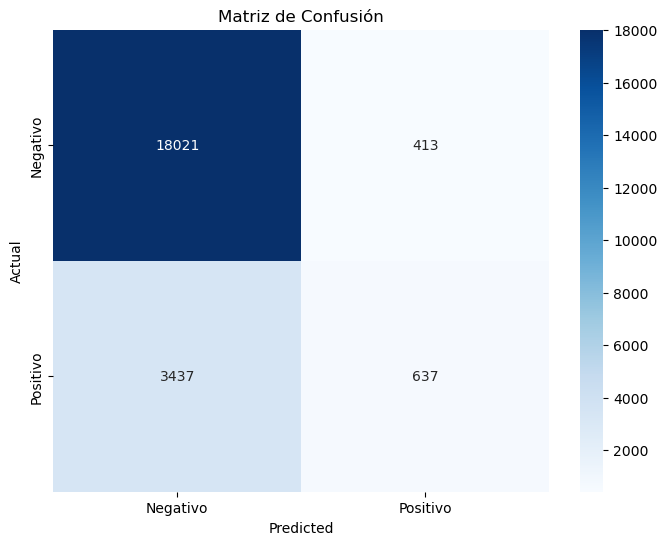

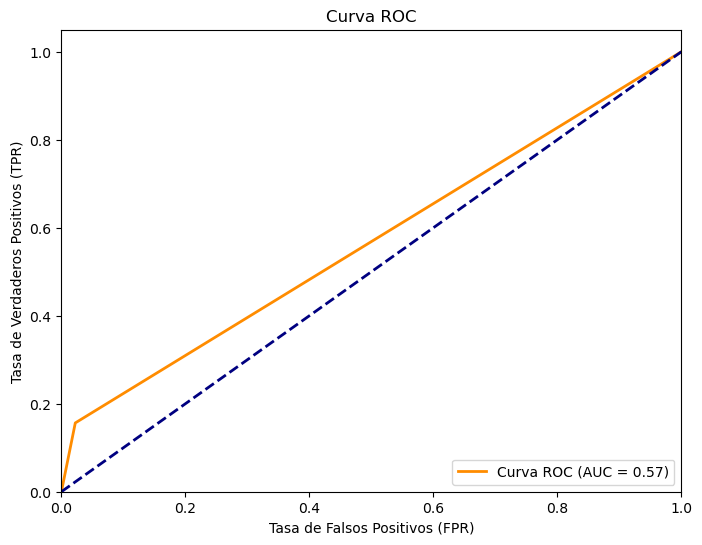

Característica: MES, Importancia: 0.2133232839924909
Característica: DIA, Importancia: 0.1816512047632747
Característica: period_day_night, Importancia: 0.059158691657263146
Característica: period_day_morning, Importancia: 0.05608871779099732
Característica: TIPOVUELO_N, Importancia: 0.04272260415931239
Característica: OPERA_Latin American Wings, Importancia: 0.039875923180193645
Característica: OPERA_Gol Trans, Importancia: 0.023531163461800172
Característica: OPERA_Sky Airline, Importancia: 0.02182524225195448
Característica: OPERA_Air Canada, Importancia: 0.019442354600261863
Característica: DIANOM_Viernes, Importancia: 0.017342037917767672
Característica: DIANOM_Lunes, Importancia: 0.016938838202448733
Característica: SIGLADES_Sydney, Importancia: 0.016449826280407844
Característica: DIANOM_Martes, Importancia: 0.01486845300492239
Característica: high_season, Importancia: 0.014541100383506167
Característica: SIGLADES_Buenos Aires, Importancia: 0.01412858637770076
Característica: OP

In [44]:
modelamiento(df_dummies,'delay_15',GradientBoostingClassifier(),parametros_GB,5,-1,5)

- El modelo Gradientboostingclassifier indica que tiene una capacidad de precisión, es decir, de todas las predicciones positivas cuantas eran correctas, es de un 84% cuando no habrá delay y de un 61% cuando si habrá, siendo este último una metrica baja, cabe destacar que es un poco mayor que lanzar una moneda al aire 50% y 50%. Por otra parte, la sensibilidad o recall que mide la proporcion de ejemplos positivos reales que fueron identificados correctamente por el modelo es de un 98% para los vuelos sin delay y 16% para vuelos con delay (4 veces mayor al primer modelo), lo que nos permite señalar que nuestro modelo podría poseer bastantes falsos negativos. En tercer lugar, la variable metrica F1, nos indica una combinación entre las 2 metricas anteriormente descritas, vale decir, precisión y recall, quien nos muestra un rendimiento de un 90% para clasificar los vuelos que no tienen delay y un bajo desempeño de 25% para aquellos vuelos con delay.

- La accurancy de este modelo es del 83%, es decir, la proporción de de predicciones totales que fueron correctas.

- Analizando la matriz de confusión, podemos observar que nuestro modelo tiene una buena capacidad de detectar aquellos que vuelos que no tienen delay, ya que, concentra la mayor cantidad de data en verdaderos negativos, seguido por la presencia de falsos negativos, métrica que nos impacta fuertmente al recall. Estos son los casos donde realmente hay delay pero el modelo no está siendo capaz de detectarlos. Luego, tenemos los casos verdaderos positivos que nos muestran aquellos vuelos con delay que realmente tuvieron delay. En último lugar, están los falsos postivos que nos los casos positivos reales que el modelo predijo incorrectamente como negativos. Son errores del modelo al no predecir la clase positiva cuando debería.

- El area bajo la curva ROC es de 0.57, esto quiere decir que tiene un rendimiento cercano al aleatorio. En consecuencia, este modelo no tien una buena capacidad para discriminar entre un vuelo con delay o sin delay.

- Las 10 variables que tuvieron un mayor peso en este modelo son las siguientes:

    - Característica: MES, Importancia: 0.2133232839924909
    - Característica: DIA, Importancia: 0.1816512047632747
    - Característica: period_day_night, Importancia: 0.059158691657263146
    - Característica: period_day_morning, Importancia: 0.05608871779099732
    - Característica: TIPOVUELO_N, Importancia: 0.04272260415931239
    - Característica: OPERA_Latin American Wings, Importancia: 0.039875923180193645
    - Característica: OPERA_Gol Trans, Importancia: 0.023531163461800172
    - Característica: OPERA_Sky Airline, Importancia: 0.02182524225195448
    - Característica: OPERA_Air Canada, Importancia: 0.019442354600261863
    - Característica: DIANOM_Viernes, Importancia: 0.017342037917767672
- En conclusión, si bien el modelo de Gradientboostingclassifier tiene un mejor rendimiento que el modelo de regresion logistica, este aún no es capaz de poder predecir con un buen rendimiento aquellos vuelos que tendrán delay.

In [45]:
### xgboost

In [ ]:
modelamiento(df_dummies,'delay_15',xgb.XGBClassifier(objective='binary:logistic'),parametros_xgboost,5,-1,5)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


In [ ]:
#RF

In [ ]:
modelamiento(df_dummies,'delay_15',RandomForestClassifier(class_weight='balanced'),parametros_RF,5,-1,5)

In [ ]:
#SVC

In [ ]:
#modelamiento(df_dummies,'delay_15',SVC(class_weight='balanced'),parametros_RF,5,-1,5)

## 5) Análisis de los modelos

- Las metricas a utilizar para comparar entre modelos son, Precisión, Recall, F1, Curva de ROC, AUC y matriz de confusion. Esto se debe a que nuestra variable objetivo es binaria, por ende, nuestro problema es de orden clasificatorio. Dicho esto, lo que necesitamos entender es la capacidad que tiene cada una de nuestras ejecuciones para precisar si un vuelo estará retrasado o no.

### Regresión Logistica: